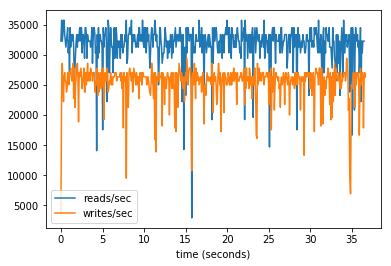

In [130]:
import csv
from datetime import datetime, timezone

import matplotlib
import pandas as pd
        
stats = []
with open('build/stats.csv', 'r') as csvfile:
    statsreader = csv.reader(csvfile)
    next(statsreader) # skip header
    for row in statsreader:
        op, start, end = row
        start = float(start[-16:])
        end = float(end[-16:])
        if start > 0:
            stats.append((op, start, end))

time_offset = stats[0][1]

sample_stride = int(len(stats) / 1000)
times, writes, reads = [], [], []
for i in range(0, len(stats) - 1, sample_stride):
    op1, start1, end1 = stats[i]
    elapsed_us = end1 - start1
    if elapsed_us > 0:
        time_s = float(end1 - time_offset) / (10**6)
        times.append(time_s)
        if op1 == 'write':
            writes.append((10**6) / elapsed_us)
        elif op1 == 'read':
            reads.append((10**6) / elapsed_us)

df = pd.DataFrame({
    'writes/sec': pd.Series(writes),
    'reads/sec': pd.Series(reads),
    'time (seconds)': pd.Series(times)
})

df.plot(x='time (seconds)')
